In [52]:
import numpy as np
import torch
import pandas as pd
import json
from random import shuffle
from torch.nn.functional import cosine_similarity
from glob import glob
cosine = lambda *args: cosine_similarity(*args, dim=0).item()

In [53]:
whisper_embeds_path = '../data/whisper_embeds/whisper_embeds.pt'
tira_embed_path = '../data/whisper_embeds/tira-asr-orig-test.pt'
tira_embed_1k = '../data/whisper_embeds/tira-1k-hf-train.pt'
tira_embed_1k_concat = '../data/whisper_embeds/tira-concat-1k-hf-train.pt'

In [54]:
whisper_embeds = torch.load(whisper_embeds_path)
whisper_embeds.keys()

dict_keys(['fleurs-it_it-test.pt', 'fleurs-lt_lt-test.pt', 'fleurs-hu_hu-test.pt', 'fleurs-nb_no-test.pt', 'fleurs-fr_fr-test.pt', 'fleurs-tr_tr-test.pt', 'fleurs-ln_cd-test.pt', 'fleurs-az_az-test.pt', 'fleurs-uz_uz-test.pt', 'fleurs-kk_kz-test.pt', 'fleurs-ar_eg-test.pt', 'fleurs-km_kh-test.pt', 'fleurs-el_gr-test.pt', 'fleurs-te_in-test.pt', 'fleurs-sw_ke-test.pt', 'fleurs-hi_in-test.pt', 'fleurs-sk_sk-test.pt', 'fleurs-mk_mk-test.pt', 'fleurs-sn_zw-test.pt', 'fleurs-fi_fi-test.pt', 'fleurs-mr_in-test.pt', 'fleurs-ca_es-test.pt', 'fleurs-fa_ir-test.pt', 'fleurs-as_in-test.pt', 'fleurs-hy_am-test.pt', 'fleurs-ro_ro-test.pt', 'fleurs-lb_lu-test.pt', 'fleurs-mn_mn-test.pt', 'fleurs-oc_fr-test.pt', 'fleurs-bg_bg-test.pt', 'fleurs-et_ee-test.pt', 'fleurs-vi_vn-test.pt', 'fleurs-sd_in-test.pt', 'fleurs-ur_pk-test.pt', 'fleurs-ps_af-test.pt', 'fleurs-es_419-test.pt', 'fleurs-ne_np-test.pt', 'fleurs-lv_lv-test.pt', 'fleurs-bn_in-test.pt', 'fleurs-tg_tj-test.pt', 'fleurs-ka_ge-test.pt', 'fle

In [55]:
commonvoice_embeds_path = '/Users/markjos/projects/malachor5/data/commonvoice/'
commonvoice_embeds_files = glob(commonvoice_embeds_path+'*.pt')
commonvoice_embeds_files

['/Users/markjos/projects/malachor5/data/commonvoice/common_voice_13_0-en-train_1k.pt']

In [56]:
commonvoice_langs={embed_file.split('-')[-2]: torch.load(embed_file) for embed_file in commonvoice_embeds_files}
commonvoice_langs['en'].shape

torch.Size([1000, 1280])

In [57]:
cosine(
    commonvoice_langs['en'].mean(dim=0),
    commonvoice_langs['en'][20]
)

0.9968932271003723

In [58]:
commonvoice_langs['en']=commonvoice_langs['en'].mean(dim=0)

In [59]:
tira_embeds = torch.load(tira_embed_1k_concat)#whisper_embeds['tira-asr-orig-test.pt']
tira_embeds.shape

torch.Size([1280])

In [60]:
whisper_embeds['tira']=tira_embeds
whisper_embeds.pop('tira-asr-orig-test.pt', None)
whisper_embeds['en_cv']=commonvoice_langs['en']

In [61]:
cos_sim = []
langs = list(whisper_embeds.keys())
shuffle(langs)
embeds = []
for lang in langs:
    cos_sim.append(cosine(whisper_embeds[lang], tira_embeds))
    embeds.append(whisper_embeds[lang])
cos_sim[:5], max(cos_sim)

([-0.012971959076821804,
  -0.020133880898356438,
  -0.019384590908885002,
  -0.014475533738732338,
  -0.019075291231274605],
 1.0000001192092896)

In [62]:
df=pd.DataFrame({'embeds_file': langs, 'cos_sim': cos_sim})
df.head()

,embeds_file,cos_sim
0,fleurs-ur_pk-test.pt,-0.012972
1,fleurs-az_az-test.pt,-0.020134
2,fleurs-hu_hu-test.pt,-0.019385
3,fleurs-ar_eg-test.pt,-0.014476
4,fleurs-es_419-test.pt,-0.019075


In [63]:
lang_code = df['embeds_file'].apply(lambda s: s.replace('fleurs-','').replace('-test.pt',''))
df['lang_code']=lang_code
df.head()

,embeds_file,cos_sim,lang_code
0,fleurs-ur_pk-test.pt,-0.012972,ur_pk
1,fleurs-az_az-test.pt,-0.020134,az_az
2,fleurs-hu_hu-test.pt,-0.019385,hu_hu
3,fleurs-ar_eg-test.pt,-0.014476,ar_eg
4,fleurs-es_419-test.pt,-0.019075,es_419


In [64]:
lang_code_path = '../meta/language_codes.json'
with open(lang_code_path) as f:
    lang_code_dict = json.load(f)
lang_code_dict.extend([
    {'fleurs': 'tira', 'whisper': 'tira'},
    {'fleurs': 'en_cv', 'whisper': 'en_cv'},
])
lang_code_dict

[{'iso2': 'en',
  'iso3': 'eng',
  'whisper': 'english',
  'fleurs': 'en_us',
  'fleurs_script': 'Latn',
  'commonvoice_code': 'en',
  'commonvoice_name': 'English'},
 {'iso2': 'de',
  'iso3': 'deu',
  'whisper': 'german',
  'fleurs': 'de_de',
  'fleurs_script': 'Latn',
  'commonvoice_code': 'de',
  'commonvoice_name': 'German'},
 {'iso2': 'es',
  'iso3': 'spa',
  'whisper': 'spanish',
  'fleurs': 'es_419',
  'fleurs_script': 'Latn',
  'commonvoice_code': 'es',
  'commonvoice_name': 'Spanish'},
 {'iso2': 'ru',
  'iso3': 'rus',
  'whisper': 'russian',
  'fleurs': 'ru_ru',
  'fleurs_script': 'Cyrl',
  'commonvoice_code': 'ru',
  'commonvoice_name': 'Russian'},
 {'iso2': 'ko',
  'iso3': 'kor',
  'whisper': 'korean',
  'fleurs': 'ko_kr',
  'fleurs_script': 'Hang',
  'commonvoice_code': 'ko',
  'commonvoice_name': 'Korean'},
 {'iso2': 'fr',
  'iso3': 'fra',
  'whisper': 'french',
  'fleurs': 'fr_fr',
  'fleurs_script': 'Latn',
  'commonvoice_code': 'fr',
  'commonvoice_name': 'French'},
 {'

In [66]:
code_to_lang = lambda lang_code: [lang['whisper'] for lang in lang_code_dict if 'fleurs' in lang and lang['fleurs']==lang_code][0]
lang_names = df['lang_code'].apply(code_to_lang)
df['lang']=lang_names
df.head()

,embeds_file,cos_sim,lang_code,lang
0,fleurs-ur_pk-test.pt,-0.012972,ur_pk,urdu
1,fleurs-az_az-test.pt,-0.020134,az_az,azerbaijani
2,fleurs-hu_hu-test.pt,-0.019385,hu_hu,hungarian
3,fleurs-ar_eg-test.pt,-0.014476,ar_eg,arabic
4,fleurs-es_419-test.pt,-0.019075,es_419,spanish


In [67]:
df.sort_values('cos_sim', ascending=False)

,embeds_file,cos_sim,lang_code,lang
39,tira,1.000000,tira,tira
29,en_cv,0.016585,en_cv,en_cv
33,fleurs-mk_mk-test.pt,-0.010236,mk_mk,macedonian
25,fleurs-kk_kz-test.pt,-0.011230,kk_kz,kazakh
64,fleurs-et_ee-test.pt,-0.011429,et_ee,estonian
...,...,...,...,...
1,fleurs-az_az-test.pt,-0.020134,az_az,azerbaijani
20,fleurs-so_so-test.pt,-0.021343,so_so,somali
46,fleurs-id_id-test.pt,-0.021898,id_id,indonesian
79,fleurs-ro_ro-test.pt,-0.021929,ro_ro,romanian


In [68]:
lang_to_embeds_file = {}
add_pair = lambda r: lang_to_embeds_file.update({r['lang']:r['embeds_file']})
df.apply(add_pair, axis=1)
lang_to_embeds_file['tira']='tira'
lang_to_embeds_file

{'urdu': 'fleurs-ur_pk-test.pt',
 'azerbaijani': 'fleurs-az_az-test.pt',
 'hungarian': 'fleurs-hu_hu-test.pt',
 'arabic': 'fleurs-ar_eg-test.pt',
 'spanish': 'fleurs-es_419-test.pt',
 'korean': 'fleurs-ko_kr-test.pt',
 'maori': 'fleurs-mi_nz-test.pt',
 'german': 'fleurs-de_de-test.pt',
 'serbian': 'fleurs-sr_rs-test.pt',
 'shona': 'fleurs-sn_zw-test.pt',
 'pashto': 'fleurs-ps_af-test.pt',
 'greek': 'fleurs-el_gr-test.pt',
 'finnish': 'fleurs-fi_fi-test.pt',
 'lithuanian': 'fleurs-lt_lt-test.pt',
 'french': 'fleurs-fr_fr-test.pt',
 'uzbek': 'fleurs-uz_uz-test.pt',
 'bengali': 'fleurs-bn_in-test.pt',
 'luxembourgish': 'fleurs-lb_lu-test.pt',
 'malay': 'fleurs-ms_my-test.pt',
 'tajik': 'fleurs-tg_tj-test.pt',
 'somali': 'fleurs-so_so-test.pt',
 'galician': 'fleurs-gl_es-test.pt',
 'dutch': 'fleurs-nl_nl-test.pt',
 'lingala': 'fleurs-ln_cd-test.pt',
 'punjabi': 'fleurs-pa_in-test.pt',
 'kazakh': 'fleurs-kk_kz-test.pt',
 'armenian': 'fleurs-hy_am-test.pt',
 'lao': 'fleurs-lo_la-test.pt',
 '

In [69]:
def compare_langs(lang1, lang2):
    embed1 = whisper_embeds[lang_to_embeds_file[lang1]]
    embed2 = whisper_embeds[lang_to_embeds_file[lang2]]
    return cosine(embed1, embed2)

compare_langs('punjabi', 'tira')

-0.01585371047258377

In [72]:
from scipy.spatial.distance import cosine, pdist, squareform
import seaborn
import matplotlib.pyplot as plt

In [73]:
dist_mat=squareform(pdist(embeds,cosine))
dist_mat.shape

(81, 81)

In [74]:
dist_df=pd.DataFrame(dist_mat, index=lang_names, columns=lang_names)
dist_df.head()

lang_code,urdu,azerbaijani,hungarian,arabic,spanish,korean,maori,german,serbian,shona,...,maltese,gujarati,portuguese,swedish,occitan,slovak,bulgarian,mongolian,romanian,hausa
lang_code,,,,,,,,,,,,,,,,,,,,,
urdu,0.000000,0.035420,0.017066,0.015539,0.049731,0.005327,0.062456,0.016107,0.010828,0.018015,...,0.018540,0.016469,0.052525,0.022219,0.084264,0.004985,0.005102,0.006338,0.046490,0.025870
azerbaijani,0.035420,0.000000,0.010525,0.021459,0.016557,0.034332,0.016096,0.014948,0.015942,0.023036,...,0.008504,0.019746,0.020936,0.009420,0.030096,0.021079,0.024259,0.021710,0.008303,0.024081
hungarian,0.017066,0.010525,0.000000,0.006366,0.013450,0.019409,0.026122,0.008879,0.003486,0.023618,...,0.003626,0.007397,0.017064,0.004658,0.039096,0.005976,0.008037,0.009398,0.014552,0.017523
arabic,0.015539,0.021459,0.006366,0.000000,0.014884,0.023464,0.031200,0.012668,0.006674,0.032158,...,0.010310,0.006850,0.015478,0.008829,0.042373,0.007399,0.007024,0.012691,0.020767,0.010973
spanish,0.049731,0.016557,0.013450,0.014884,0.000000,0.059119,0.013089,0.022644,0.019214,0.058716,...,0.020897,0.015761,0.002880,0.011507,0.017006,0.028485,0.029541,0.037057,0.009050,0.016660


In [75]:
lang_names.tolist()

['urdu',
 'azerbaijani',
 'hungarian',
 'arabic',
 'spanish',
 'korean',
 'maori',
 'german',
 'serbian',
 'shona',
 'pashto',
 'greek',
 'finnish',
 'lithuanian',
 'french',
 'uzbek',
 'bengali',
 'luxembourgish',
 'malay',
 'tajik',
 'somali',
 'galician',
 'dutch',
 'lingala',
 'punjabi',
 'kazakh',
 'armenian',
 'lao',
 'georgian',
 'en_cv',
 'russian',
 'danish',
 'nepali',
 'macedonian',
 'khmer',
 'bosnian',
 'swahili',
 'turkish',
 'czech',
 'tira',
 'italian',
 'icelandic',
 'amharic',
 'vietnamese',
 'ukrainian',
 'belarusian',
 'indonesian',
 'catalan',
 'japanese',
 'telugu',
 'marathi',
 'english',
 'tamil',
 'persian',
 'croatian',
 'slovenian',
 'thai',
 'kannada',
 'afrikaans',
 'assamese',
 'welsh',
 'polish',
 'sindhi',
 'hebrew',
 'estonian',
 'hindi',
 'javanese',
 'norwegian',
 'latvian',
 'yoruba',
 'malayalam',
 'maltese',
 'gujarati',
 'portuguese',
 'swedish',
 'occitan',
 'slovak',
 'bulgarian',
 'mongolian',
 'romanian',
 'hausa']

In [76]:
dist_df['tira']

lang_code
urdu           1.012972
azerbaijani    1.020134
hungarian      1.019385
arabic         1.014476
spanish        1.019075
                 ...   
slovak         1.015542
bulgarian      1.016559
mongolian      1.016573
romanian       1.021929
hausa          1.012535
Name: tira, Length: 81, dtype: float64

In [135]:
dist_df.to_csv('../data/whisper_embeds/dist_matrix.csv')

In [136]:
# dist_df = dist_df.drop('tira', axis=1)
# dist_df = dist_df.drop('tira', axis=0)

<Axes: xlabel='lang_code', ylabel='lang_code'>

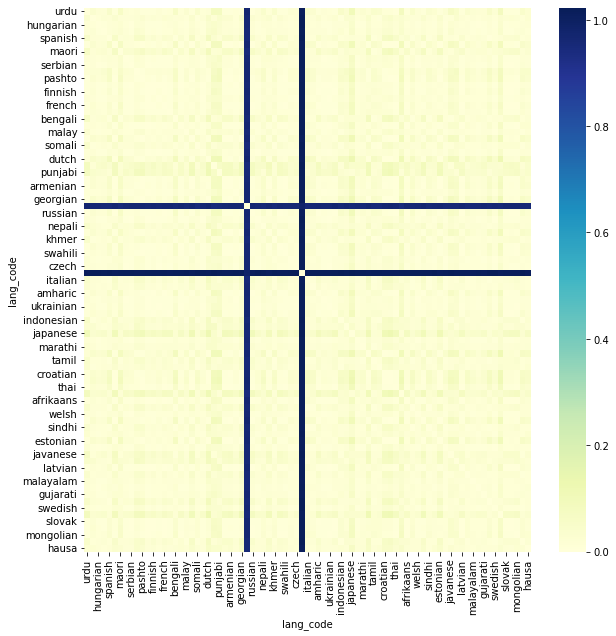

In [77]:
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(dist_df, cmap='YlGnBu')